In [ ]:
!pip install --upgrade pip
!pip install iqm-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of iqm-exa-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of iqm-exa-common to 

In [ ]:
!pip install "qrisp[iqm]"

INFO: pip is looking at multiple versions of numpy-typing-compat to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 15.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 58.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 43.6 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 111.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 90.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 92.6 MB/s  0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.14.0
    Uninstalling sympy-1.14.0:
      Successfully uninstalled sympy-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstallin

In [ ]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc

In [ ]:
import numpy as np
from qrisp import *
from qrisp.operators import Z

from qrisp.interface import IQMBackend
quantum_computer = IQMBackend(
    api_token = input("api token: "),
        device_instance = "garnet") # Change this to change which device you run on

use_real_machine = False

def measurement_strategy(state, x, y):
    # Alice's measurement
    if x == 0:
        pass
    else:
        h(state[0])

    # Bob's measurement
    if y == 0:
        ry(-np.pi/4, state[1])
    else:
        ry(np.pi/4, state[1])

    results = state.get_measurement()
    if use_real_machine:
        results = state.get_measurement(backend=quantum_computer)

    res = [results.get('00', 0), results.get('01', 0),
           results.get('10', 0), results.get('11', 0)]
    return res

def sim(res):
    # print(res)
    list = [(0, 0), (0, 1), (1, 0), (1, 1)]
    (alice, bob) = list[np.random.choice([0, 1, 2, 3], p=res)]
    return (int(alice), int(bob), int(alice) ^ int(bob))

for (a,b) in [(0,0),(0,1),(1,0),(1,1)]:
    # prepare a phi+ state
    bell = QuantumVariable(2)
    h(bell[0])
    cx(bell[0], bell[1])
    res = measurement_strategy(bell,a,b)
    # print(res)
    suc = 0
    for i in range(100):
        x = sim(res)[2]
        # print(f'0 = {x}')
        if a*b == x:
            suc += 1
    print(f'{(a,b)} in sim: {suc}% match')
use_real_machine = True
for (a,b) in [(0,0),(0,1),(1,0),(1,1)]:
    # prepare a phi+ state
    bell = QuantumVariable(2)
    h(bell[0])
    cx(bell[0], bell[1])
    res = measurement_strategy(bell,a,b)
    # print(res)
    suc = 0
    for i in range(100):
        x = sim(res)[2]
        # print(f'0 = {x}')
        if a*b == x:
            suc += 1
    print(f'{(a,b)} on Garnet: {suc}% match')

(0, 0) in sim: 75% match
(0, 1) in sim: 84% match
(1, 0) in sim: 83% match
(1, 1) in sim: 86% match


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 0) on Garnet: 94% match


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(0, 1) on Garnet: 78% match


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 0) on Garnet: 85% match


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 1) on Garnet: 87% match


In [ ]:
import numpy as np
from qrisp import *
from qrisp.operators import Z

from qrisp.interface import IQMBackend
quantum_computer = IQMBackend(
    api_token = input("api key: "),
        device_instance = "garnet") # Change this to change which device you run on

use_real_machine = False

def measurement_strategy(state, x, y, z, w):
    # Alice's measurement
    if x == 0:
        u3(3 * np.pi/2, 13 * np.pi/15, 7 * np.pi/5, state[0])
    else:
        u3(np.pi/2, 11 * np.pi/7, 21 * np.pi/11, state[0])

    # Bob's measurement
    if y == 0:
        u3(3 * np.pi/2, 6 * np.pi/5, 19 * np.pi/12, state[1])
    else:
        u3(3 * np.pi/2, 19 * np.pi/15, np.pi/12, state[1])

    # Carol's measurement
    if z == 0:
        u3(np.pi/2, 27 * np.pi/14, 8 * np.pi/7, state[2])
    else:
        u3(np.pi/2, 23 * np.pi/12, 23 * np.pi/14, state[2])

    # Dan's measurement
    if w == 0:
        u3(3 * np.pi/2, 11 * np.pi/9, 8 * np.pi/13, state[3])
    else:
        u3(np.pi/2, 3 * np.pi/14, np.pi/9, state[3])

    results = state.get_measurement()
    if use_real_machine:
        results = state.get_measurement(backend=quantum_computer)
    res = [results.get('0000', 0), results.get('0001', 0),
           results.get('0010', 0), results.get('0011', 0),
           results.get('0100', 0), results.get('0101', 0),
           results.get('0110', 0), results.get('0111', 0),
           results.get('1000', 0), results.get('1001', 0),
           results.get('1010', 0), results.get('1011', 0),
           results.get('1100', 0), results.get('1101', 0),
           results.get('1110', 0), results.get('1111', 0)]
    return res

def sim(res):
    # print(res)
    lisss = [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]
    (alice, bob, carol, dan) = lisss[np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], p=res)]
    return (int(alice), int(bob), int(carol), int(dan), int(alice) ^ int(bob) ^ int(carol) ^ int(dan))

liss = [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]
for lis in liss:
    # prepare a GHZ4 state
    n = 4
    state = QuantumVariable(n)
    h(state[0])
    for i in range(n-1):
        cx(state[i], state[i+1])
    res = measurement_strategy(state,lis[3],lis[0],lis[1],lis[2])
    lhs = lis[0] * lis[1] * lis[2] + lis[0] * lis[1] * (1 - lis[3]) + lis[0] * lis[2] * (1 - lis[3]) + lis[1] * lis[2] * (1 - lis[3]) + lis[3] * (1 - lis[0]) * (1 - lis[1]) * (1 - lis[2]) + lis[0] * lis[1] * lis[2] * (1 - lis[3])
    lhs %= 2
    suc = 0
    for i in range(100):
        x = sim(res)[4]
        # print(f'{lhs} = {x}')
        if lhs == x:
            suc += 1
    print(f'{lis} in simulation: {suc}% success')

use_real_machine = True

for lis in liss:
    # prepare a GHZ4 state
    n = 4
    state = QuantumVariable(n)
    h(state[0])
    for i in range(n-1):
        cx(state[i], state[i+1])
    res = measurement_strategy(state,lis[3],lis[0],lis[1],lis[2])
    lhs = lis[0] * lis[1] * lis[2] + lis[0] * lis[1] * (1 - lis[3]) + lis[0] * lis[2] * (1 - lis[3]) + lis[1] * lis[2] * (1 - lis[3]) + lis[3] * (1 - lis[0]) * (1 - lis[1]) * (1 - lis[2]) + lis[0] * lis[1] * lis[2] * (1 - lis[3])
    lhs %= 2
    suc = 0
    for i in range(100):
        x = sim(res)[4]
        # print(f'{lhs} = {x}')
        if lhs == x:
            suc += 1
    print(f'{lis} on Garnet: {suc}% success')


(0, 0, 0, 0) in simulation: 88% success
(0, 0, 0, 1) in simulation: 84% success
(0, 0, 1, 0) in simulation: 85% success
(0, 0, 1, 1) in simulation: 87% success
(0, 1, 0, 0) in simulation: 84% success
(0, 1, 0, 1) in simulation: 89% success
(0, 1, 1, 0) in simulation: 79% success
(0, 1, 1, 1) in simulation: 88% success
(1, 0, 0, 0) in simulation: 90% success
(1, 0, 0, 1) in simulation: 86% success
(1, 0, 1, 0) in simulation: 87% success
(1, 0, 1, 1) in simulation: 85% success
(1, 1, 0, 0) in simulation: 80% success
(1, 1, 0, 1) in simulation: 81% success
(1, 1, 1, 0) in simulation: 89% success
(1, 1, 1, 1) in simulation: 86% success


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(0, 0, 0, 0) on Garnet: 73% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 0, 0, 1) on Garnet: 75% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 0, 1, 0) on Garnet: 78% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 0, 1, 1) on Garnet: 83% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 1, 0, 0) on Garnet: 74% success


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(0, 1, 0, 1) on Garnet: 83% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(0, 1, 1, 0) on Garnet: 76% success


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(0, 1, 1, 1) on Garnet: 77% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 0, 0, 0) on Garnet: 76% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 0, 0, 1) on Garnet: 73% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 0, 1, 0) on Garnet: 83% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 0, 1, 1) on Garnet: 77% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 1, 0, 0) on Garnet: 78% success


Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 1, 0, 1) on Garnet: 68% success


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(1, 1, 1, 0) on Garnet: 75% success


Progress in queue:   0%|          | 0/2 [00:00<?, ?it/s]

(1, 1, 1, 1) on Garnet: 79% success


Loosely based on the paper, [Four-qubit CHSH game by Jusseau et al.](https://link.springer.com/article/10.1007/s11128-025-04939-8)

The CHSH game is a thought experiment based on the CHSH inequality, aiming to demonstrate distinctiveness of quantum superpositions by showing that they can provide improvement in the game. In its general form, the two-player CHSH game is as follows: Two functions $f(x,y)$ and $g(a,b)$ are chosen. (The function $g$ is usually chosen to be the XOR function.) Alice is given the bit $x$ and Bob is given $y$; without communicating, Alice should output $a$ and Bob $b$ such that $f(x,y) = g(a,b)$.

Fixing $g$ as the $XOR$ function, we can find certain choices of $f$ for which classical algorithms can only have Alice and Bob output the correct answer probabilistically. For instance, let $f(x,y) = xy$. However, if Alice and Bob are given a pair of entangled qubits beforehand, then they can win the game with approximately $85\%$ probability, better than any classical algorithm.

In the first cell above, we demonstrate this CHSH game, running it on IQM Resonance. Due to noise, the output is a little less than ideal and varies across runs.

More excitingly, the CHSH game is generalizable to an arbitrary number of players, reflecting the generalization to arbitrarily many entangled qubits. Instead of the Bell state $\Phi^+$, we use a $GHZ^n$ state, with each player having access to one of the qubits in the entanglement. As the number $n$ grows, it becomes harder and harder to find functions due to the number of possible candidates increasing exponentially. Here we implement a simulation of the $4$-player CHSH game, with $g(a,b,c,d) = XOR$, and $f$ being a very specific boolean formula.

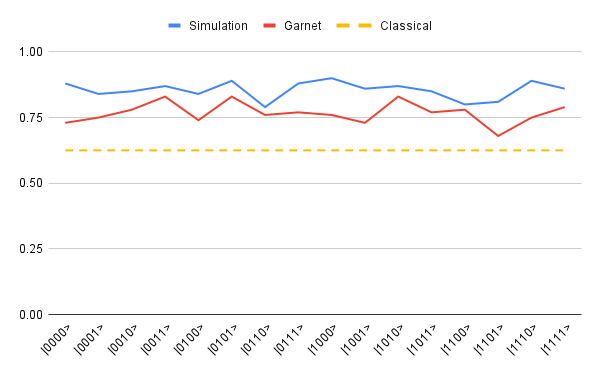

Though we noticed less than ideal success rates on the actual machine due to noise, the resulting success rate is still higher than what is achievable classically!